In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt

In [2]:
#Loading Data from directory
data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/brain-tumor-classification-mri/Training')

Found 2870 files belonging to 4 classes.


In [3]:
#Scaling image to between 0 - 1, using a lambda in order to scale images as they are recieved from the pipeline
data = data.map(lambda x, y: (x/255, y))

In [4]:
#Creating an iterator for data instead of downloading data individually, decreasing processing time
data_iterator = data.as_numpy_iterator()

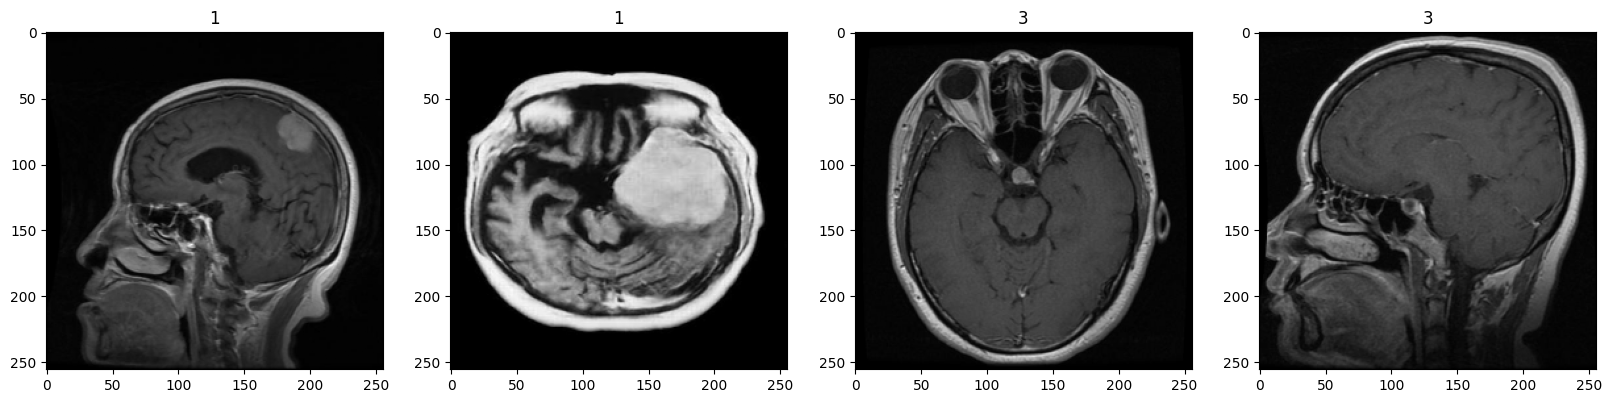

In [5]:
#Visualizing the dataset as a batch
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [6]:
#Splitting Data
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1) + 1

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [7]:
#Model Creation
mind = keras.Sequential()
mind.add(keras.layers.Conv2D(16, (3, 3), 1, activation='relu', input_shape = (256, 256, 3)))
mind.add(keras.layers.MaxPooling2D())

mind.add(keras.layers.Conv2D(32, (3, 3), 1, activation='relu'))
mind.add(keras.layers.MaxPooling2D())

mind.add(keras.layers.Conv2D(16, (3, 3), 1, activation='relu'))
mind.add(keras.layers.MaxPooling2D())
#Applying a convolutional layer will return a matrix, and so must be flatten for final values
mind.add(keras.layers.Flatten())
mind.add(keras.layers.Dense(256, activation = 'relu'))
mind.add(keras.layers.Dense(4, activation = 'softmax'))

In [8]:
mind.compile(
    optimizer = tf.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [9]:
mind.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [10]:
hist = mind.fit(train, epochs = 20, validation_data = val)

Epoch 1/20
62/62 [==============================] - 73s 1s/step - loss: 0.9150 - accuracy: 0.6003 - val_loss: 0.6254 - val_accuracy: 0.7431
Epoch 2/20
62/62 [==============================] - 71s 1s/step - loss: 0.5655 - accuracy: 0.7661 - val_loss: 0.5592 - val_accuracy: 0.7865
Epoch 3/20
62/62 [==============================] - 71s 1s/step - loss: 0.3755 - accuracy: 0.8513 - val_loss: 0.5408 - val_accuracy: 0.8073
Epoch 4/20
62/62 [==============================] - 71s 1s/step - loss: 0.2334 - accuracy: 0.9057 - val_loss: 0.3845 - val_accuracy: 0.8663
Epoch 5/20
62/62 [==============================] - 70s 1s/step - loss: 0.1442 - accuracy: 0.9471 - val_loss: 0.4166 - val_accuracy: 0.8490
Epoch 6/20
62/62 [==============================] - 71s 1s/step - loss: 0.0938 - accuracy: 0.9662 - val_loss: 0.4413 - val_accuracy: 0.8924
Epoch 7/20
62/62 [==============================] - 70s 1s/step - loss: 0.0672 - accuracy: 0.9773 - val_loss: 0.3505 - val_accuracy: 0.9132
Epoch 8/20
62/62 [==

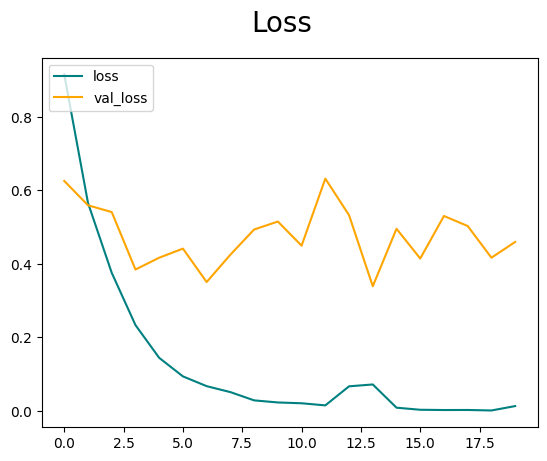

In [11]:
#Plotting Loss Performance
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

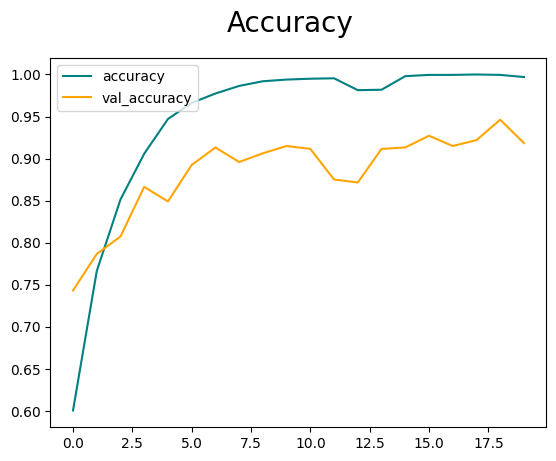

In [12]:
#Plotting Accuracy Performance
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [13]:
#Evaluating the model
mind.evaluate(test)

10/10 [==============================] - 6s 261ms/step - loss: 0.6223 - accuracy: 0.8742


[0.6222894191741943, 0.874193549156189]

93% Accuracy without regularizers